In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import Adam,lr_scheduler
from IPython.display import clear_output
from tqdm import tqdm
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix,ConfusionMatrixDisplay
torch.cuda.empty_cache()
torch.manual_seed(42)
normal_heartbeat=pd.read_csv("ptbdb_normal.csv")
normal_heartbeat

,Valoare 1,Valoare 2,Valoare 3,Valoare 4,Valoare 5,Valoare 6,Valoare 7,Valoare 8,Valoare 9,Valoare 10,...,Valoare 179,Valoare 180,Valoare 181,Valoare 182,Valoare 183,Valoare 184,Valoare 185,Valoare 186,Valoare 187,Clasa
0,1.000,0.900,0.3590,0.0515,0.0466,0.12700,0.1330,0.1190,0.1110,0.1130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000,0.795,0.3750,0.1170,0.0000,0.17200,0.2840,0.2940,0.3260,0.3450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909,0.791,0.4230,0.1870,0.0000,0.00784,0.0630,0.0770,0.0750,0.0773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000,0.479,0.0568,0.0642,0.0813,0.07270,0.0556,0.0488,0.0545,0.0416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000,0.867,0.2010,0.0993,0.1410,0.12100,0.1090,0.0964,0.0934,0.1010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000,0.930,0.5040,0.2930,0.1700,0.16000,0.1310,0.1250,0.1370,0.1110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000,0.638,0.1550,0.0620,0.0890,0.08340,0.0651,0.0574,0.0600,0.0600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000,0.873,0.4650,0.2320,0.1260,0.15600,0.1750,0.1900,0.2040,0.1690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.916,0.529,0.2880,0.1450,0.1720,0.18100,0.1780,0.1760,0.1790,0.1800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
abnormal_heartbeat=pd.read_csv("ptbdb_abnormal.csv")
abnormal_heartbeat

,Valoare 1,Valoare 2,Valoare 3,Valoare 4,Valoare 5,Valoare 6,Valoare 7,Valoare 8,Valoare 9,Valoare 10,...,Valoare 179,Valoare 180,Valoare 181,Valoare 182,Valoare 183,Valoare 184,Valoare 185,Valoare 186,Valoare 187,Clasa
0,0.932,0.870,0.886,0.9300,0.909,0.934,0.8010,0.7500,0.6870,0.6350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000,0.607,0.384,0.2540,0.224,0.277,0.2530,0.1850,0.1530,0.1220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000,0.952,0.924,0.8530,0.792,0.734,0.6720,0.6850,0.6710,0.6670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.978,0.899,0.230,0.0323,0.142,0.224,0.3280,0.3680,0.3820,0.3890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.936,0.802,0.806,1.0000,0.723,0.481,0.4550,0.3200,0.2670,0.3080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981,1.000,0.559,0.2870,0.197,0.205,0.2160,0.2440,0.2430,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906,0.922,0.878,0.8100,0.713,0.667,0.6090,0.5270,0.4810,0.4430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000,0.868,0.674,0.4700,0.297,0.169,0.0777,0.0814,0.0749,0.0898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000,0.985,0.659,0.5560,0.447,0.396,0.3150,0.2760,0.2610,0.2590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
total_heartbeats=pd.concat([normal_heartbeat,abnormal_heartbeat])
total_heartbeats.shape

(14552, 188)

# Analiza setului de date - tipurile de batai de inimia

In [5]:
class_labels=total_heartbeats["Clasa"]

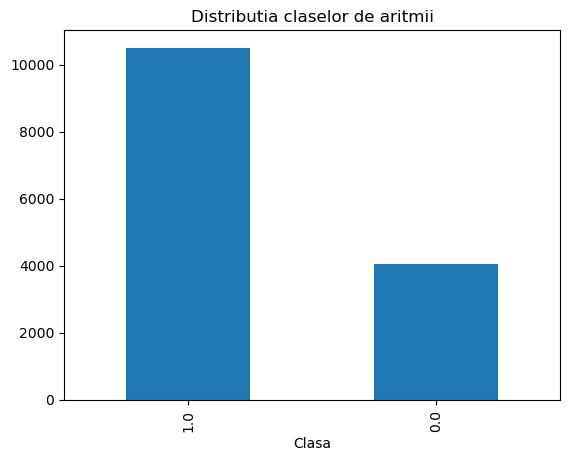

In [6]:
class_labels.value_counts().plot.bar()
plt.title("Distributia claselor de aritmii")
plt.show()

57


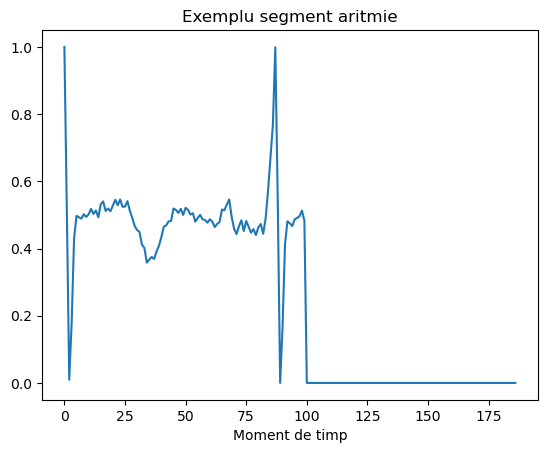

In [7]:
random_abnormal=random.randint(0,abnormal_heartbeat.shape[0]-1)
print(random_abnormal)
plt.plot(np.arange(0,187),abnormal_heartbeat.iloc[random_abnormal,:-1].to_numpy())
plt.xlabel("Moment de timp")
plt.title("Exemplu segment aritmie")
plt.show()

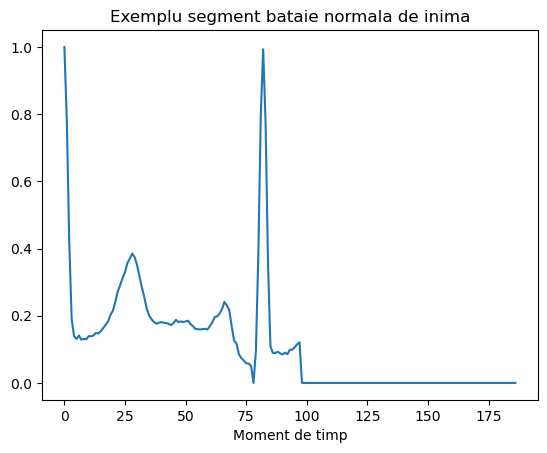

In [8]:
random_normal=random.randint(0,normal_heartbeat.shape[0]-1)
plt.plot(np.arange(0,187),normal_heartbeat.iloc[random_normal,:-1].to_numpy())
plt.xlabel("Moment de timp")
plt.title("Exemplu segment bataie normala de inima")
plt.show()

## Afisare medie si deviatie standard pe unitatea de timp

In [9]:
normal_heartbeat.iloc[0:3,0]

0    1.000
1    1.000
2    0.909
Name: Valoare 1, dtype: float64

In [10]:
col_means_normal,col_std_normal,col_means_abnormal,col_std_abnormal=np.zeros(187),np.zeros(187),np.zeros(187),np.zeros(187)
for i in range(187):
    column_normal=normal_heartbeat.iloc[:,i].to_numpy()
    col_means_normal[i]=np.mean(column_normal)
    col_std_normal[i]=np.std(column_normal)
    column_abnormal=abnormal_heartbeat.iloc[:,i].to_numpy()
    col_means_abnormal[i]=np.mean(column_abnormal)
    col_std_abnormal[i]=np.std(column_abnormal)

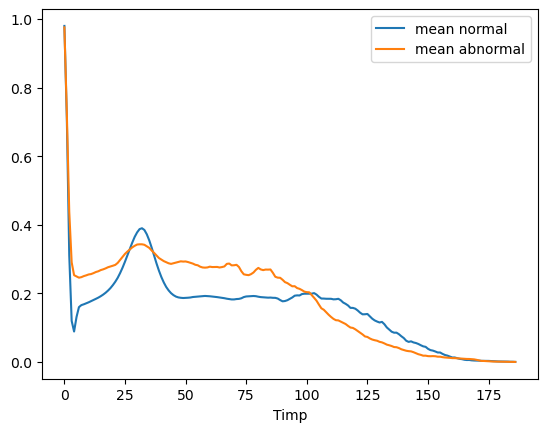

In [11]:
plt.plot(np.arange(187),col_means_normal,label="mean normal")
plt.plot(np.arange(187),col_means_abnormal,label="mean abnormal")
plt.legend()
plt.xlabel("Timp")
plt.show()

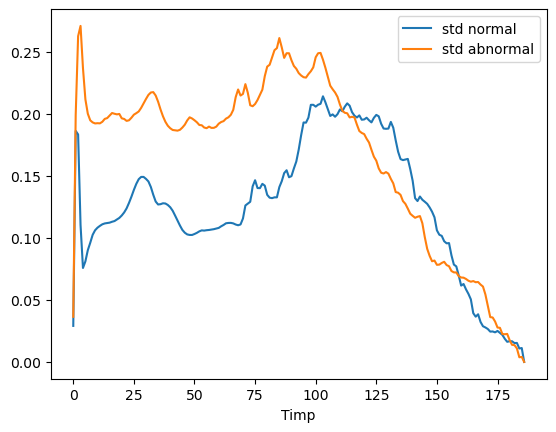

In [12]:
plt.plot(np.arange(187),col_std_normal,label="std normal")
plt.plot(np.arange(187),col_std_abnormal,label="std abnormal")
plt.legend()
plt.xlabel("Timp")
plt.show()

In [13]:
total_heartbeats.iloc[:,-1]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10501    1.0
10502    1.0
10503    1.0
10504    1.0
10505    1.0
Name: Clasa, Length: 14552, dtype: float64

## Arhitectura convolutionala

In [14]:
train_val_data,test_data=train_test_split(total_heartbeats,test_size=0.10,random_state=42,stratify=total_heartbeats.iloc[:,-1].to_numpy())
train_data,val_data=train_test_split(train_val_data,test_size=1/9,random_state=42,stratify=train_val_data.iloc[:,-1].to_numpy())

In [15]:
train_data_features=torch.tensor(train_data.iloc[:,:-1].to_numpy(),dtype=torch.float32)
train_data_labels=torch.tensor(train_data.iloc[:,-1].to_numpy())
val_data_features=torch.tensor(val_data.iloc[:,:-1].to_numpy(),dtype=torch.float32)
val_data_labels=torch.tensor(val_data.iloc[:,-1].to_numpy())
test_data_features=torch.tensor(test_data.iloc[:,:-1].to_numpy(),dtype=torch.float32)
test_data_labels=torch.tensor(test_data.iloc[:,-1].to_numpy())

In [39]:
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features=features
        self.labels=labels
    def __getitem__(self,idx):
        return self.features[idx],self.labels[idx]
    def __len__(self):
        return self.features.shape[0]
    
trainDataset=CustomDataset(train_data_features,train_data_labels)
valDataset=CustomDataset(val_data_features,val_data_labels)
testDataset=CustomDataset(test_data_features,test_data_labels)

In [106]:
len(testDataset)

1456

187 feature-uri  --> (187-5+2*p)/s+1      

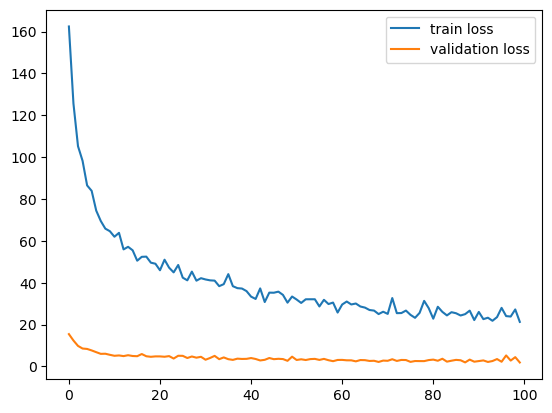

In [41]:
number_input_features=train_data_features.shape[1]
conv_net=nn.Sequential(
    nn.Conv1d(in_channels=1,out_channels=15,kernel_size=3,stride=1), #1,187 ->(15,(187-3)/1+1) ->(5,185)
    nn.ReLU(),
    nn.AvgPool1d(kernel_size=5), # =>(15,37)
    nn.Dropout(p=0.1),
    nn.Conv1d(in_channels=15,out_channels=10,kernel_size=5,stride=1,padding=1), # (15,37) ->(10,35)
    nn.Tanh(),
    nn.Flatten(1),
    nn.Linear(350,100),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(100,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=32
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(conv_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses=[]
val_losses=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
conv_net=conv_net.to(device)
for i in range(num_epochs):
    train_loss=0
    conv_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    conv_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses),label="validation loss")
        plt.legend()
        plt.show()
conv_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values,predictions=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.unsqueeze(1).to(device)
    out=conv_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values=torch.cat((true_values,labels.flatten()))
    predictions=torch.cat((predictions,after_sig.flatten()))
predictions=torch.where(predictions>=0.5,1.0,0.0)

In [50]:
def compute_scores(true_values,predictions):
    results=precision_recall_fscore_support(true_values.numpy(),predictions.numpy())
    precision,recall,fscore,_=results
    for i in [0,1]:
        print("Results class {}".format(i))
        print("Precision = {:.4f}".format(precision[i]))
        print("Recall = {:.4f}".format(recall[i]))
        print("F1 = {:.4f}".format(fscore[i]))
compute_scores(true_values,predictions)

Results class 0
Precision = 0.9509
Recall = 0.9556
F1 = 0.9532
Results class 1
Precision = 0.9828
Recall = 0.9810
F1 = 0.9819


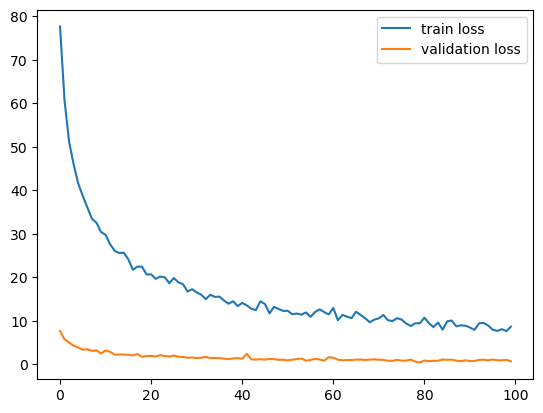

In [73]:
number_input_features=train_data_features.shape[1]
conv_net=nn.Sequential(
    nn.Conv1d(in_channels=1,out_channels=15,kernel_size=3,stride=1), #1,187 ->(15,(187-3)/1+1) ->(5,185)
    nn.ReLU(),
    nn.AvgPool1d(kernel_size=5), # =>(15,37)
    nn.Dropout(p=0.1),
    nn.Conv1d(in_channels=15,out_channels=10,kernel_size=5,stride=1,padding=1), # (15,37) ->(10,35)
    nn.Tanh(),
    nn.Flatten(1),
    nn.Linear(350,100),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(100,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(conv_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses_1=[]
val_losses_1=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
conv_net=conv_net.to(device)
for i in range(num_epochs):
    train_loss=0
    conv_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_1.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    conv_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_1.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_1),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_1),label="validation loss")
        plt.legend()
        plt.show()
conv_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_1,predictions_1=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.unsqueeze(1).to(device)
    out=conv_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_1=torch.cat((true_values_1,labels.flatten()))
    predictions_1=torch.cat((predictions_1,after_sig.flatten()))
predictions_1=torch.where(predictions_1>=0.5,1.0,0.0)

In [74]:
compute_scores(true_values_1,predictions_1)

Results class 0
Precision = 0.9701
Recall = 0.9630
F1 = 0.9665
Results class 1
Precision = 0.9858
Recall = 0.9886
F1 = 0.9872


In [75]:
len(train_losses_1)

100

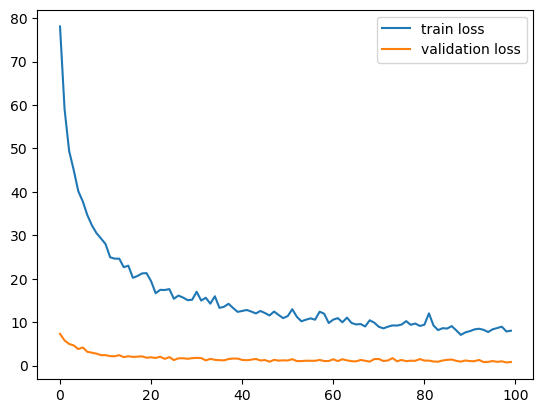

In [54]:
number_input_features=train_data_features.shape[1]
conv_net=nn.Sequential(
    nn.Conv1d(in_channels=1,out_channels=15,kernel_size=3,stride=1), #1,187 ->(15,(187-3)/1+1) ->(5,185)
    nn.ReLU(),
    nn.AvgPool1d(kernel_size=3), # =>(15,61)
    nn.Dropout(p=0.1),
    nn.Conv1d(in_channels=15,out_channels=10,kernel_size=5,stride=1,padding=1), # (15,61) ->(10,59)
    nn.Tanh(),
    nn.Flatten(1),
    nn.Linear(590,100),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(100,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(conv_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses_2=[]
val_losses_2=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
conv_net=conv_net.to(device)
for i in range(num_epochs):
    train_loss=0
    conv_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_2.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    conv_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_2.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_2),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_2),label="validation loss")
        plt.legend()
        plt.show()
conv_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_2,predictions_2=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.unsqueeze(1).to(device)
    out=conv_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_2=torch.cat((true_values_2,labels.flatten()))
    predictions_2=torch.cat((predictions_2,after_sig.flatten()))
predictions_2=torch.where(predictions_2>=0.5,1.0,0.0)

In [55]:
compute_scores(true_values_2,predictions_2)

Results class 0
Precision = 0.9633
Recall = 0.9728
F1 = 0.9681
Results class 1
Precision = 0.9895
Recall = 0.9857
F1 = 0.9876


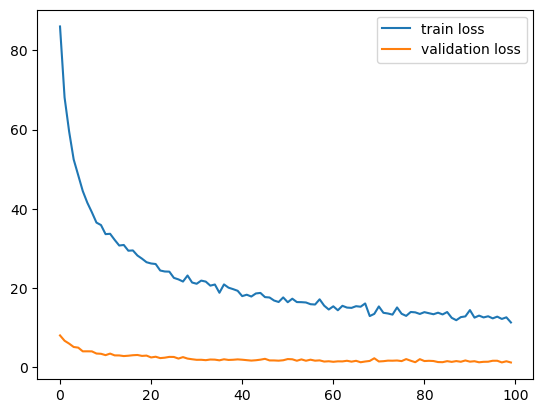

In [56]:
number_input_features=train_data_features.shape[1]
conv_net=nn.Sequential(
    nn.Conv1d(in_channels=1,out_channels=15,kernel_size=3,stride=1), #1,187 ->(15,(187-3)/1+1) ->(5,185)
    nn.ReLU(),
    nn.AvgPool1d(kernel_size=3), # =>(15,61)
    nn.Dropout(p=0.2),
    nn.Conv1d(in_channels=15,out_channels=10,kernel_size=5,stride=1,padding=1), # (15,61) ->(10,59)
    nn.Tanh(),
    nn.Flatten(1),
    nn.Linear(590,100),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(100,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(conv_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses_3=[]
val_losses_3=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
conv_net=conv_net.to(device)
for i in range(num_epochs):
    train_loss=0
    conv_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_3.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    conv_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_3.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_3),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_3),label="validation loss")
        plt.legend()
        plt.show()
conv_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_3,predictions_3=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.unsqueeze(1).to(device)
    out=conv_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_3=torch.cat((true_values_3,labels.flatten()))
    predictions_3=torch.cat((predictions_3,after_sig.flatten()))
predictions_3=torch.where(predictions_3>=0.5,1.0,0.0)

In [57]:
compute_scores(true_values_3,predictions_3)

Results class 0
Precision = 0.9531
Recall = 0.9531
F1 = 0.9531
Results class 1
Precision = 0.9819
Recall = 0.9819
F1 = 0.9819


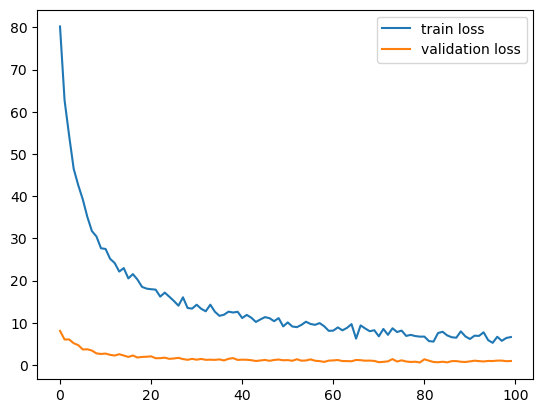

In [58]:
number_input_features=train_data_features.shape[1]
conv_net=nn.Sequential(
    nn.Conv1d(in_channels=1,out_channels=15,kernel_size=3,stride=1), #1,187 ->(15,(187-3)/1+1) ->(5,185)
    nn.ReLU(),
    nn.AvgPool1d(kernel_size=3), # =>(15,61)
    nn.Dropout(p=0.1),
    nn.Conv1d(in_channels=15,out_channels=10,kernel_size=3,stride=2,padding=1), # (15,61) ->(10,31)
    nn.Tanh(),
    nn.Flatten(1),
    nn.Linear(310,100),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(100,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(conv_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses_4=[]
val_losses_4=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
conv_net=conv_net.to(device)
for i in range(num_epochs):
    train_loss=0
    conv_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_4.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    conv_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_4.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_4),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_4),label="validation loss")
        plt.legend()
        plt.show()
conv_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_4,predictions_4=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.unsqueeze(1).to(device)
    out=conv_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_4=torch.cat((true_values_4,labels.flatten()))
    predictions_4=torch.cat((predictions_4,after_sig.flatten()))
predictions_4=torch.where(predictions_4>=0.5,1.0,0.0)

In [60]:
compute_scores(true_values_4,predictions_4)

Results class 0
Precision = 0.9850
Recall = 0.9728
F1 = 0.9789
Results class 1
Precision = 0.9896
Recall = 0.9943
F1 = 0.9919


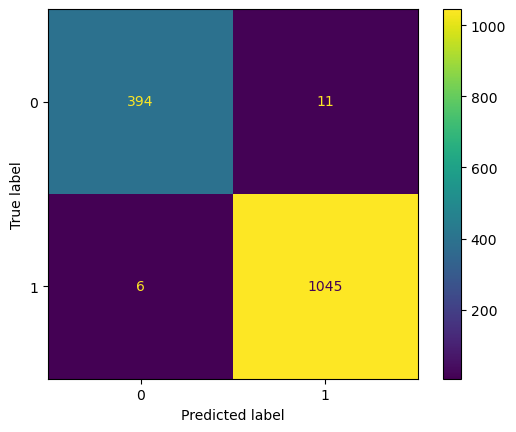

In [103]:
ConfusionMatrixDisplay(confusion_matrix(true_values_4,predictions_4)).plot()
plt.show()

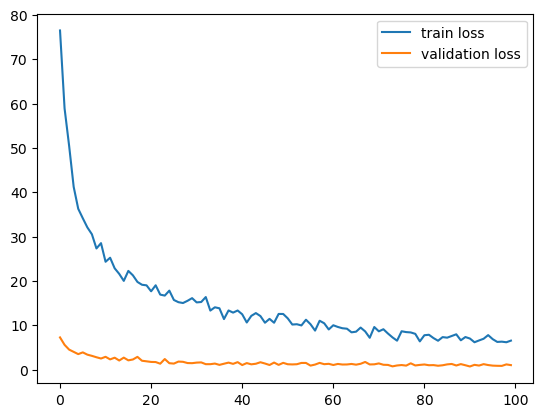

In [61]:
number_input_features=train_data_features.shape[1]
conv_net=nn.Sequential(
    nn.Conv1d(in_channels=1,out_channels=15,kernel_size=3,stride=1), #1,187 ->(15,(187-3)/1+1) ->(5,185)
    nn.ReLU(),
    nn.AvgPool1d(kernel_size=3), # =>(15,61)
    nn.Dropout(p=0.1),
    nn.Conv1d(in_channels=15,out_channels=10,kernel_size=3,stride=1,padding=1), # (15,61) ->(10,61)
    nn.Tanh(),
    nn.Flatten(1),
    nn.Linear(610,100),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(100,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(conv_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses_5=[]
val_losses_5=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
conv_net=conv_net.to(device)
for i in range(num_epochs):
    train_loss=0
    conv_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_5.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    conv_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.unsqueeze(1).to(device)
        out=conv_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_5.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_5),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_5),label="validation loss")
        plt.legend()
        plt.show()
conv_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_5,predictions_5=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.unsqueeze(1).to(device)
    out=conv_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_5=torch.cat((true_values_5,labels.flatten()))
    predictions_5=torch.cat((predictions_5,after_sig.flatten()))
predictions_5=torch.where(predictions_5>=0.5,1.0,0.0)

In [62]:
compute_scores(true_values_5,predictions_5)

Results class 0
Precision = 0.9724
Recall = 0.9580
F1 = 0.9652
Results class 1
Precision = 0.9839
Recall = 0.9895
F1 = 0.9867


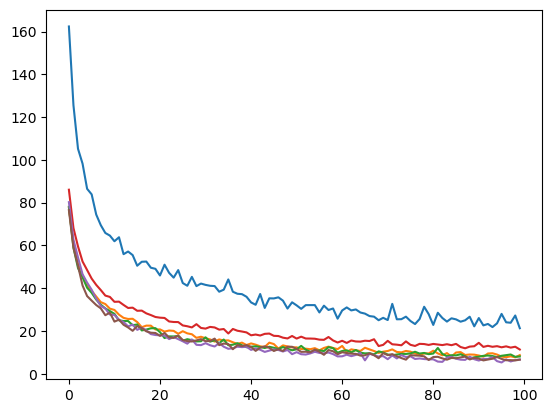

In [80]:
plt.plot(np.arange(num_epochs),train_losses,label="train_conv1")
plt.plot(np.arange(num_epochs),train_losses_1,label="train_conv2")
plt.plot(np.arange(num_epochs),train_losses_2,label="train_conv3")
plt.plot(np.arange(num_epochs),train_losses_3,label="train_conv4")
plt.plot(np.arange(num_epochs),train_losses_4,label="train_conv5")
plt.plot(np.arange(num_epochs),train_losses_5,label="train_conv6")


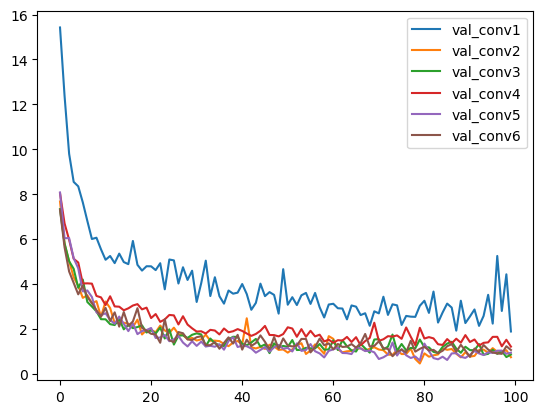

In [81]:
plt.plot(np.arange(num_epochs),val_losses,label="val_conv1")
plt.plot(np.arange(num_epochs),val_losses_1,label="val_conv2")
plt.plot(np.arange(num_epochs),val_losses_2,label="val_conv3")
plt.plot(np.arange(num_epochs),val_losses_3,label="val_conv4")
plt.plot(np.arange(num_epochs),val_losses_4,label="val_conv5")
plt.plot(np.arange(num_epochs),val_losses_5,label="val_conv6")
plt.legend()
plt.show()

## Arhitectura MLP pe aritmii

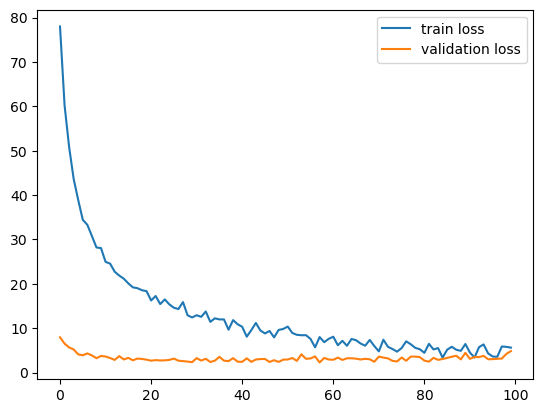

In [86]:
number_input_features=train_data_features.shape[1]
MLP_net=nn.Sequential(
    nn.Linear(187,100),
    nn.ReLU(),
    nn.Linear(100,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(MLP_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses_MLP_0=[]
val_losses_MLP_0=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
MLP_net=MLP_net.to(device)
for i in range(num_epochs):
    train_loss=0
    MLP_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_MLP_0.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    MLP_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_MLP_0.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_MLP_0),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_MLP_0),label="validation loss")
        plt.legend()
        plt.show()
MLP_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_MLP_0,predictions_MLP_0=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.unsqueeze(1).to(device)
    out=MLP_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_MLP_0=torch.cat((true_values_MLP_0,labels.flatten()))
    predictions_MLP_0=torch.cat((predictions_MLP_0,after_sig.flatten()))
predictions_MLP_0=torch.where(predictions_MLP_0>=0.5,1.0,0.0)

In [87]:
compute_scores(true_values_MLP_0,predictions_MLP_0)

Results class 0
Precision = 0.9497
Recall = 0.8864
F1 = 0.9170
Results class 1
Precision = 0.9573
Recall = 0.9819
F1 = 0.9695


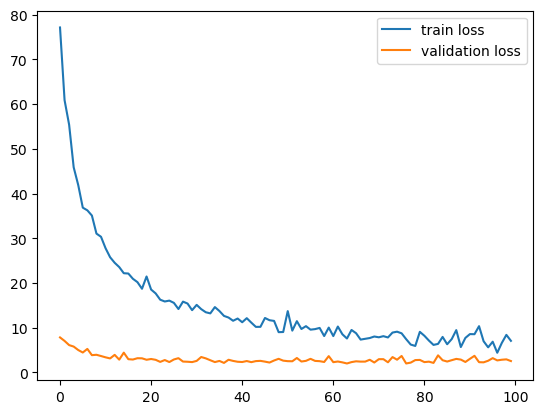

Results class 0
Precision = 0.9229
Recall = 0.9457
F1 = 0.9341
Results class 1
Precision = 0.9789
Recall = 0.9696
F1 = 0.9742


In [89]:
number_input_features=train_data_features.shape[1]
MLP_net=nn.Sequential(
    nn.Linear(187,100),
    nn.ReLU(),
    nn.Linear(100,20),
    nn.Tanh(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(MLP_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses_MLP_1=[]
val_losses_MLP_1=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
MLP_net=MLP_net.to(device)
for i in range(num_epochs):
    train_loss=0
    MLP_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_MLP_1.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    MLP_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_MLP_1.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_MLP_1),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_MLP_1),label="validation loss")
        plt.legend()
        plt.show()
MLP_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_MLP_1,predictions_MLP_1=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.to(device)
    out=MLP_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_MLP_1=torch.cat((true_values_MLP_1,labels.flatten()))
    predictions_MLP_1=torch.cat((predictions_MLP_1,after_sig.flatten()))
predictions_MLP_1=torch.where(predictions_MLP_1>=0.5,1.0,0.0)
compute_scores(true_values_MLP_1,predictions_MLP_1)

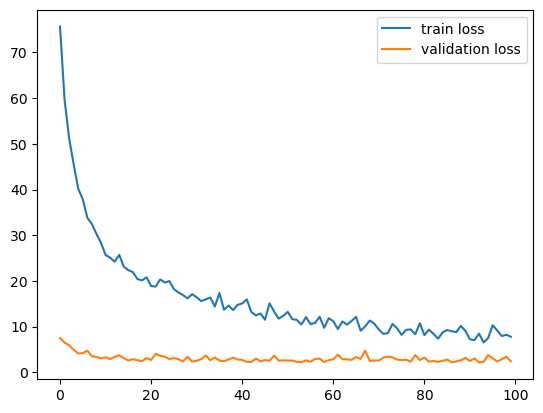

Results class 0
Precision = 0.9385
Recall = 0.9037
F1 = 0.9208
Results class 1
Precision = 0.9634
Recall = 0.9772
F1 = 0.9702


In [91]:
number_input_features=train_data_features.shape[1]
MLP_net=nn.Sequential(
    nn.Linear(187,100),
    nn.ReLU(),
    nn.Linear(100,250),
    nn.ReLU(),
    nn.Linear(250,20),
    nn.Tanh(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(MLP_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.99)
train_losses_MLP_2=[]
val_losses_MLP_2=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
MLP_net=MLP_net.to(device)
for i in range(num_epochs):
    train_loss=0
    MLP_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_MLP_2.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    MLP_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_MLP_2.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_MLP_2),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_MLP_2),label="validation loss")
        plt.legend()
        plt.show()
MLP_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_MLP_2,predictions_MLP_2=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.to(device)
    out=MLP_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_MLP_2=torch.cat((true_values_MLP_2,labels.flatten()))
    predictions_MLP_2=torch.cat((predictions_MLP_2,after_sig.flatten()))
predictions_MLP_2=torch.where(predictions_MLP_2>=0.5,1.0,0.0)
compute_scores(true_values_MLP_2,predictions_MLP_2)

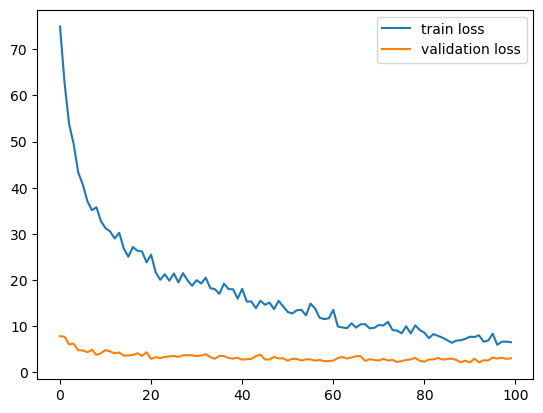

Results class 0
Precision = 0.9444
Recall = 0.9235
F1 = 0.9338
Results class 1
Precision = 0.9708
Recall = 0.9791
F1 = 0.9749


In [93]:
number_input_features=train_data_features.shape[1]
MLP_net=nn.Sequential(
    nn.Linear(187,100),
    nn.ReLU(),
    nn.Linear(100,250),
    nn.Dropout(p=0.15),
    nn.ReLU(),
    nn.Linear(250,20),
    nn.Tanh(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(MLP_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.8)
train_losses_MLP_3=[]
val_losses_MLP_3=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
MLP_net=MLP_net.to(device)
for i in range(num_epochs):
    train_loss=0
    MLP_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_MLP_3.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    MLP_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_MLP_3.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_MLP_3),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_MLP_3),label="validation loss")
        plt.legend()
        plt.show()
MLP_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_MLP_3,predictions_MLP_3=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.to(device)
    out=MLP_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_MLP_3=torch.cat((true_values_MLP_3,labels.flatten()))
    predictions_MLP_3=torch.cat((predictions_MLP_3,after_sig.flatten()))
predictions_MLP_3=torch.where(predictions_MLP_3>=0.5,1.0,0.0)
compute_scores(true_values_MLP_3,predictions_MLP_3)

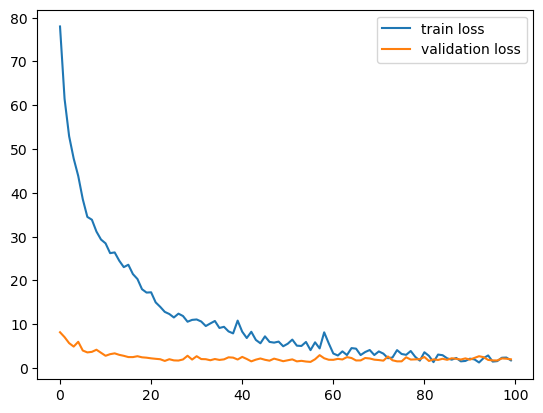

Results class 0
Precision = 0.9668
Recall = 0.9333
F1 = 0.9497
Results class 1
Precision = 0.9746
Recall = 0.9876
F1 = 0.9811


In [107]:
number_input_features=train_data_features.shape[1]
MLP_net=nn.Sequential(
    nn.Linear(187,100),
    nn.Tanh(),
    nn.Linear(100,250),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(250,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(MLP_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.8)
train_losses_MLP_4=[]
val_losses_MLP_4=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
MLP_net=MLP_net.to(device)
for i in range(num_epochs):
    train_loss=0
    MLP_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_MLP_4.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    MLP_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_MLP_4.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_MLP_4),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_MLP_4),label="validation loss")
        plt.legend()
        plt.show()
MLP_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_MLP_4,predictions_MLP_4=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.to(device)
    out=MLP_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_MLP_4=torch.cat((true_values_MLP_4,labels.flatten()))
    predictions_MLP_4=torch.cat((predictions_MLP_4,after_sig.flatten()))
predictions_MLP_4=torch.where(predictions_MLP_4>=0.5,1.0,0.0)
compute_scores(true_values_MLP_4,predictions_MLP_4)

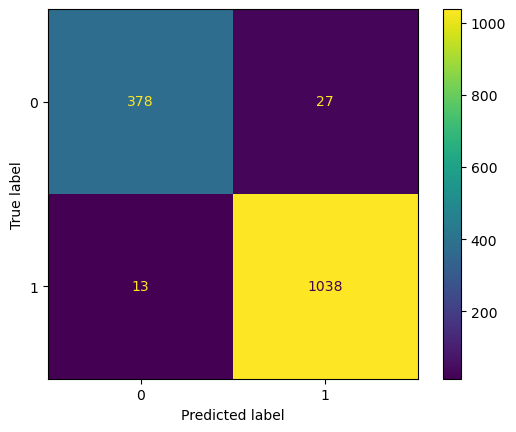

In [108]:
ConfusionMatrixDisplay(confusion_matrix(true_values_MLP_4,predictions_MLP_4)).plot()
plt.show()

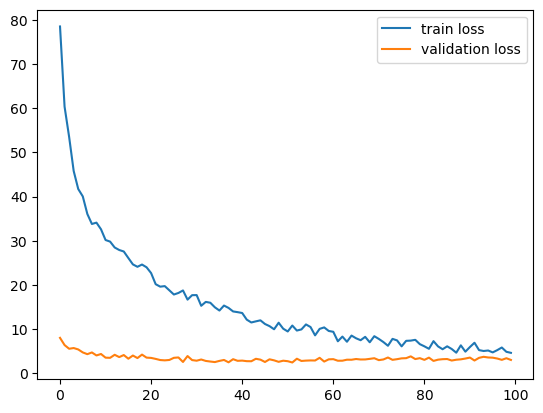

Results class 0
Precision = 0.9426
Recall = 0.9333
F1 = 0.9380
Results class 1
Precision = 0.9744
Recall = 0.9781
F1 = 0.9763


In [97]:
number_input_features=train_data_features.shape[1]
MLP_net=nn.Sequential(
    nn.Linear(187,100),
    nn.ReLU(),
    nn.Linear(100,250),
    nn.Dropout(p=0.3),
    nn.ReLU(),
    nn.Linear(250,20),
    nn.ReLU(),
    nn.Linear(20,1)
)
#conv_net=nn.Conv1d(in_channels=1,out_channels=5,kernel_size=3,stride=2)
batch_size=64
trainLoader=DataLoader(trainDataset,batch_size=batch_size,shuffle=True)
valLoader=DataLoader(valDataset,batch_size=batch_size,shuffle=True)
testLoader=DataLoader(testDataset,batch_size=batch_size,shuffle=True)
optimizer=Adam(MLP_net.parameters(),lr=1e-2)
loss_fn=nn.BCEWithLogitsLoss()
exp_lr_scheduler=lr_scheduler.ExponentialLR(optimizer,gamma=0.8)
train_losses_MLP_5=[]
val_losses_MLP_5=[]
num_epochs=100
device='cuda' if torch.cuda.is_available() else 'cpu'
MLP_net=MLP_net.to(device)
for i in range(num_epochs):
    train_loss=0
    MLP_net.train()
    for features,labels in trainLoader:
        optimizer.zero_grad()
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        train_loss+=loss.cpu().item()
        loss.backward()
        optimizer.step()
    train_losses_MLP_5.append(train_loss)
    #print("Epoch {} train loss is {}".format(i,train_loss))
    MLP_net.eval()
    val_loss=0
    for features,labels in valLoader:
        features_=features.to(device)
        out=MLP_net(features_)
        labels_=labels.unsqueeze(1).to(device)
        loss=loss_fn(out,labels_)
        val_loss+=loss.cpu().item()
    val_losses_MLP_5.append(val_loss)
    if(i%20==0):
        exp_lr_scheduler.step()
    if(i>=3):
        clear_output(True)
        plt.plot(np.arange(i+1),np.array(train_losses_MLP_5),label="train loss")
        plt.plot(np.arange(i+1),np.array(val_losses_MLP_5),label="validation loss")
        plt.legend()
        plt.show()
MLP_net.eval()
sigmoid_fn=nn.Sigmoid()
true_values_MLP_5,predictions_MLP_5=torch.tensor([]),torch.tensor([])
for features,labels in testLoader:
    features_=features.to(device)
    out=MLP_net(features_)
    after_sig=sigmoid_fn(out).cpu().flatten()
    true_values_MLP_5=torch.cat((true_values_MLP_5,labels.flatten()))
    predictions_MLP_5=torch.cat((predictions_MLP_5,after_sig.flatten()))
predictions_MLP_5=torch.where(predictions_MLP_5>=0.5,1.0,0.0)
compute_scores(true_values_MLP_5,predictions_MLP_5)

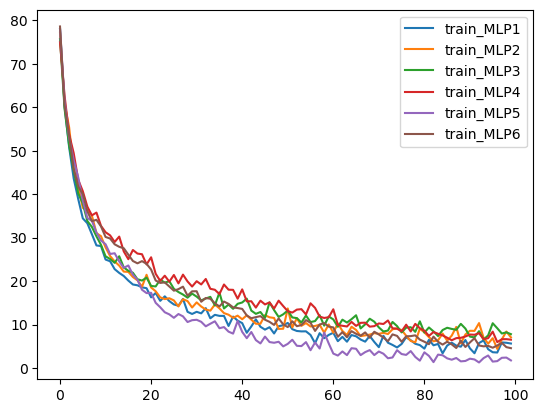

In [109]:
plt.plot(np.arange(num_epochs),train_losses_MLP_0,label="train_MLP1")
plt.plot(np.arange(num_epochs),train_losses_MLP_1,label="train_MLP2")
plt.plot(np.arange(num_epochs),train_losses_MLP_2,label="train_MLP3")
plt.plot(np.arange(num_epochs),train_losses_MLP_3,label="train_MLP4")
plt.plot(np.arange(num_epochs),train_losses_MLP_4,label="train_MLP5")
plt.plot(np.arange(num_epochs),train_losses_MLP_5,label="train_MLP6")
plt.legend()
plt.show()

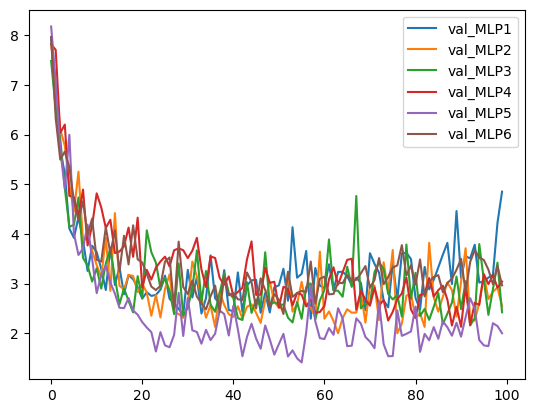

In [110]:
plt.plot(np.arange(num_epochs),val_losses_MLP_0,label="val_MLP1")
plt.plot(np.arange(num_epochs),val_losses_MLP_1,label="val_MLP2")
plt.plot(np.arange(num_epochs),val_losses_MLP_2,label="val_MLP3")
plt.plot(np.arange(num_epochs),val_losses_MLP_3,label="val_MLP4")
plt.plot(np.arange(num_epochs),val_losses_MLP_4,label="val_MLP5")
plt.plot(np.arange(num_epochs),val_losses_MLP_5,label="val_MLP6")
plt.legend()
plt.show()